<a href="https://colab.research.google.com/github/a151815058/20211129_ch2/blob/main/20211129_ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. 取得資料

## 1.1 下載資料

In [42]:
import urllib.request

URL = 'http://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'

urllib.request.urlretrieve(URL, 'housing.csv')

('housing.csv', <http.client.HTTPMessage at 0x7f5d2f8efa10>)

## 1.2 讀取 .csv

In [43]:
data = pd.read_csv('housing.csv')

In [62]:
data.shape

(20640, 10)

In [44]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 1.3 初探資料

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [46]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [47]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


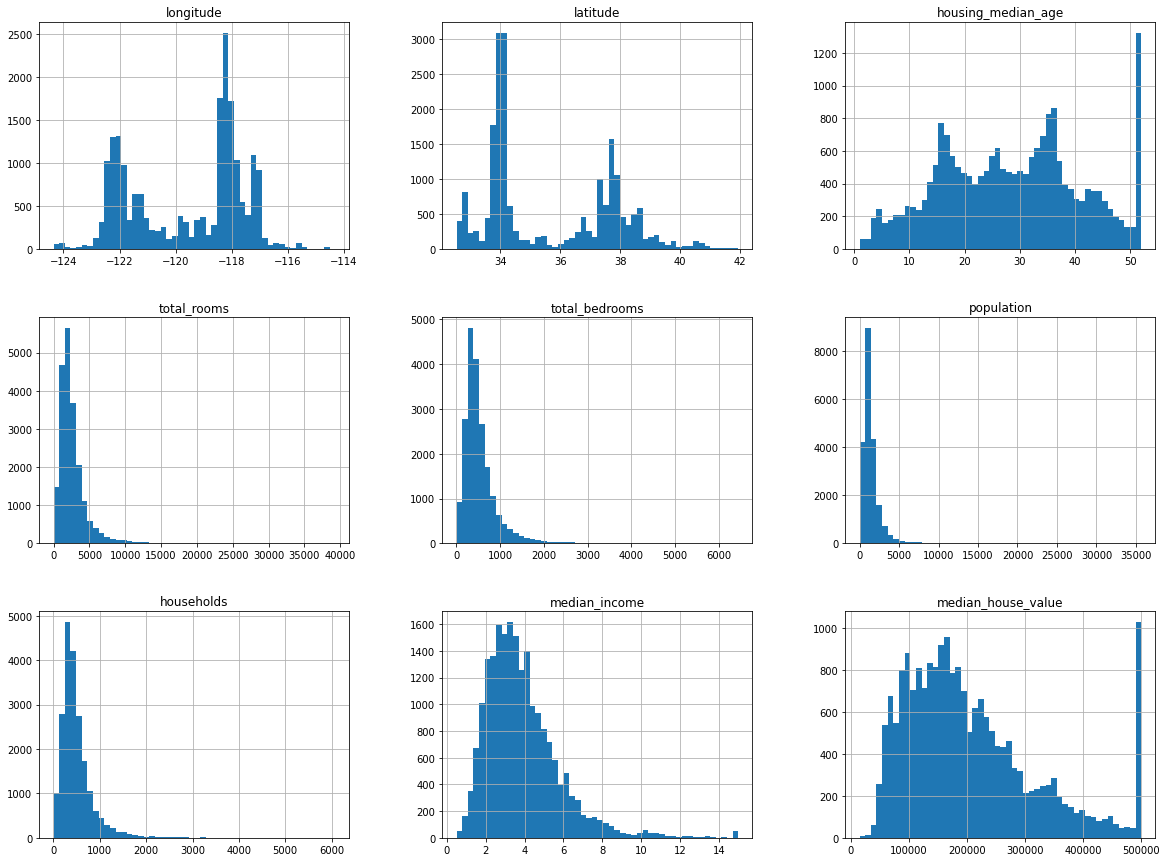

In [48]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

# 2. 建立訓練集/測試集

In [49]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=1)

In [50]:
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

# 3. 檢視訓練資料

## 3.1 地理資料視覺化 

In [51]:
import matplotlib.image as mpimg

url = 'https://raw.githubusercontent.com/ageron/\
handson-ml2/master/images/end_to_end_project/california.png'

urllib.request.urlretrieve(url,'california.png')
img = mpimg.imread('california.png')

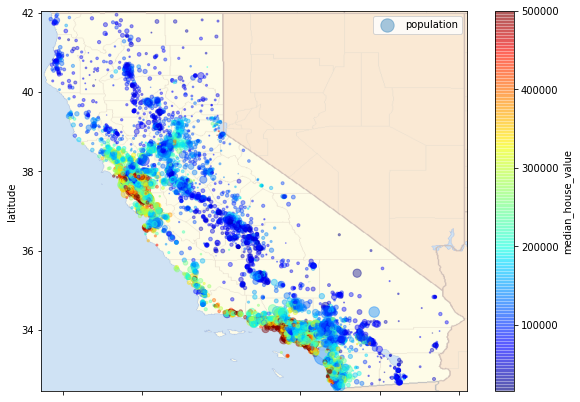

In [52]:
train_set.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
              s=train_set['population']/100, label='population', figsize=(10,7),
              c='median_house_value', cmap=plt.get_cmap('jet'))
plt.imshow(img, alpha=0.5, extent=[-124.55, -113.80, 32.45, 42.05])

plt.show()

## 3.2 相關性分析

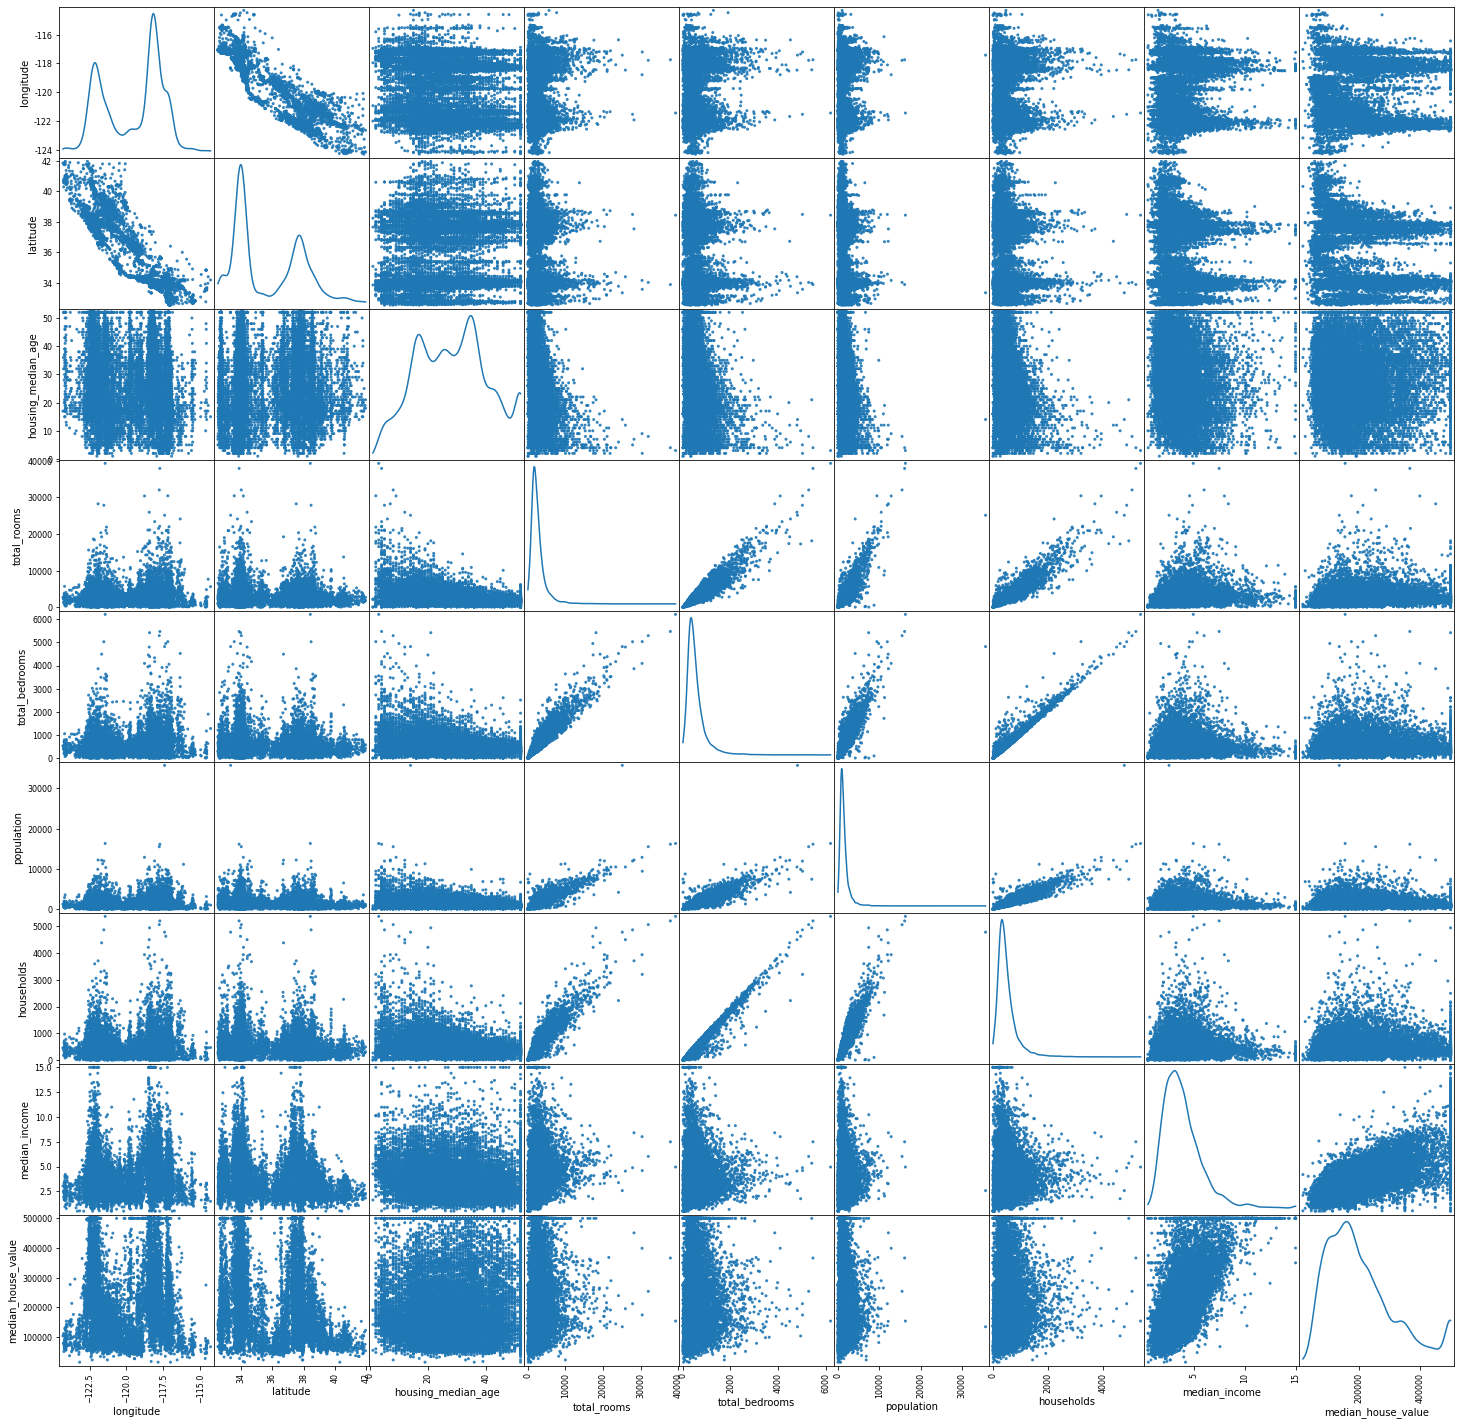

In [53]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_set,figsize =(25, 25), alpha=0.9,
               diagonal="kde",marker='.')
plt.show()

In [54]:
corr = train_set.corr()
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688194
total_rooms           0.135514
housing_median_age    0.105758
households            0.066801
total_bedrooms        0.050560
population           -0.023884
longitude            -0.050893
latitude             -0.139374
Name: median_house_value, dtype: float64

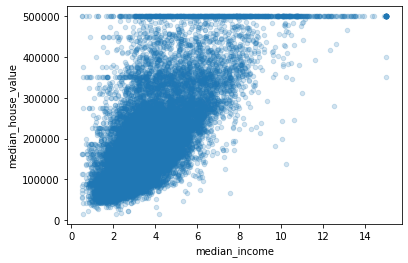

In [55]:
train_set.plot(kind='scatter', x='median_income', y='median_house_value', 
               alpha=0.2)
plt.show()

# 4. 清理與準備訓練資料

In [56]:
x_train = train_set.drop('median_house_value', axis=1)
y_train = train_set['median_house_value'].copy()

## (4.1 遺失值處理)

In [57]:
x_train_num = x_train.drop('ocean_proximity', axis=1)

In [58]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
x_train_num_imp = imputer.fit_transform(x_train_num)
imputer.statistics_

array([-118.49   ,   34.26   ,   29.     , 2127.     ,  435.     ,
       1164.     ,  410.     ,    3.54455])

## (4.2 類別變數處理)

In [59]:
x_train_cat = x_train[['ocean_proximity']]
x_train_cat.value_counts()

ocean_proximity
<1H OCEAN          7341
INLAND             5193
NEAR OCEAN         2136
NEAR BAY           1837
ISLAND                5
dtype: int64

In [60]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
x_train_cat_ohe = ohe.fit_transform(x_train_cat)
x_train_cat_ohe.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 4.3 準備訓練資料

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

pip_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

pip_full = ColumnTransformer([
    ('num', pip_num, list(x_train)[:8]),
    ('cat', OneHotEncoder(), [list(x_train)[-1]])
])

x_train_prep = pip_full.fit_transform(x_train)
x_train_prep.shape

(16512, 13)

# 5. 訓練與選擇模型

## (5.1 不使用交叉驗證)

### LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train_prep, y_train)
lin_reg.score(x_train_prep, y_train)

0.6471234406034171

### DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=1)
tree_reg.fit(x_train_prep, y_train)
tree_reg.score(x_train_prep, y_train)

1.0

### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=1)
rf_reg.fit(x_train_prep, y_train)
rf_reg.score(x_train_prep, y_train)

0.9752676762656552

## 5.2 使用交叉驗證來做更好的評估

In [ ]:
from sklearn.model_selection import cross_val_score

### LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_scores = cross_val_score(lin_reg, x_train_prep, y_train, scoring='r2', cv=10)
lin_scores

array([0.62322921, 0.65645997, 0.65711307, 0.65417369, 0.61783282,
       0.65312461, 0.66419524, 0.64852354, 0.6389309 , 0.63806544])

In [ ]:
lin_scores.mean(), lin_scores.std()

(0.6451648495347907, 0.014511268316674212)

### DecisionTreeRegressor

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=1)
tree_scores = cross_val_score(tree_reg, x_train_prep, y_train, 
                              scoring='r2', cv=10)
tree_scores

array([0.62149636, 0.64117884, 0.66691466, 0.68318068, 0.62068836,
       0.64180119, 0.62812367, 0.63812617, 0.64381228, 0.6879263 ])

In [ ]:
tree_scores.mean(), tree_scores.std()

(0.6473248506477172, 0.022865729428939278)

### RandomForestRegressor

In [ ]:
rf_reg = RandomForestRegressor(random_state=1)
rf_scores = cross_val_score(rf_reg, x_train_prep, y_train, scoring='r2', cv=10)
rf_scores

array([0.81037282, 0.8206976 , 0.83595298, 0.82104647, 0.80883116,
       0.8236809 , 0.83063172, 0.81539222, 0.81190395, 0.82505208])

In [ ]:
rf_scores.mean(), rf_scores.std()

(0.8203561890777493, 0.008432792192187058)

# 6. 調整模型

## 6.1 Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8)
}

rnd_reg = RandomForestRegressor(random_state=1)
rnd_search = RandomizedSearchCV(rnd_reg, param_distributions=param_distribs, 
                                n_iter=10, cv=5, scoring='r2', random_state=1)
rnd_search.fit(x_train_prep, y_train)
rnd_search.best_params_

{'max_features': 6, 'n_estimators': 141}

In [ ]:
rlt = rnd_search.cv_results_
for mean_score, params in zip(rlt['mean_test_score'], rlt['params']):
    print(mean_score, params)

0.8199906933163504 {'max_features': 6, 'n_estimators': 141}
0.7860664564439663 {'max_features': 1, 'n_estimators': 138}
0.8169325345090133 {'max_features': 4, 'n_estimators': 134}
0.7863368996436174 {'max_features': 1, 'n_estimators': 145}
0.7991070034887755 {'max_features': 2, 'n_estimators': 72}
0.8198697371798271 {'max_features': 6, 'n_estimators': 135}
0.8018083739706723 {'max_features': 2, 'n_estimators': 179}
0.8194622973787379 {'max_features': 5, 'n_estimators': 102}
0.810144795998276 {'max_features': 3, 'n_estimators': 140}
0.8198088417740893 {'max_features': 5, 'n_estimators': 157}


## 6.2 選擇最佳模型

In [ ]:
best_model = rnd_search.best_estimator_

# 7. 驗證與解釋模型

## 7.1 驗證模型

In [ ]:
x_test = test_set.drop('median_house_value', axis=1)
y_test = test_set['median_house_value'].copy()

In [ ]:
x_test_prep = pip_full.transform(x_test)
best_model.score(x_test_prep, y_test)

0.8250885166982723

## 7.2 解釋模型

In [ ]:
imp = best_model.feature_importances_
imp

array([1.20989054e-01, 1.09242771e-01, 4.74117188e-02, 3.39841941e-02,
       2.98389725e-02, 4.19180823e-02, 2.69768288e-02, 4.11093423e-01,
       1.59437210e-02, 1.53069989e-01, 3.19256477e-04, 2.36464129e-03,
       6.84734678e-03])

In [ ]:
cat_one_hot_attribs = list(pip_full.named_transformers_['cat'].categories_[0])
features = list(x_train)[:8] + cat_one_hot_attribs
sorted(zip(imp, features), reverse=True)

[(0.41109342345252375, 'median_income'),
 (0.15306998927046686, 'INLAND'),
 (0.12098905445202936, 'longitude'),
 (0.10924277083069527, 'latitude'),
 (0.047411718830387965, 'housing_median_age'),
 (0.04191808225060058, 'population'),
 (0.03398419410680274, 'total_rooms'),
 (0.02983897245094751, 'total_bedrooms'),
 (0.02697682884800493, 'households'),
 (0.015943720967360367, '<1H OCEAN'),
 (0.006847346776206739, 'NEAR OCEAN'),
 (0.0023646412868398954, 'NEAR BAY'),
 (0.0003192564771338848, 'ISLAND')]

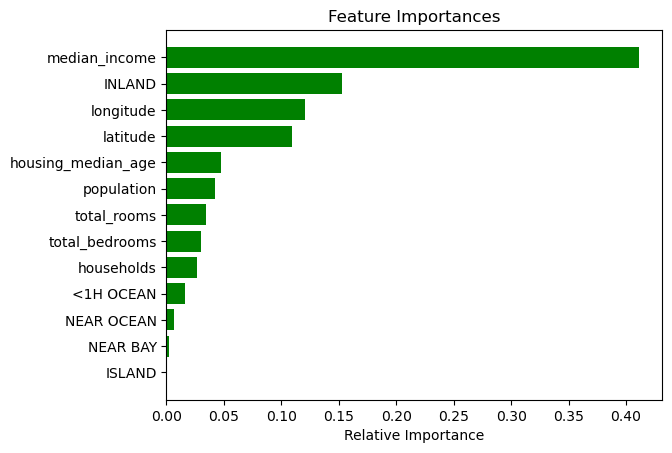

In [ ]:
ind = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(ind)), imp[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

# 8. 發佈模型

## 8.1 最終模型整合

In [ ]:
pip_final = Pipeline([
    ('preparation', pip_full),
    ('linear', best_model)
])
pip_final.fit(x_train, y_train)

final_model = pip_final

## 8.2 儲存最終模型

In [ ]:
import joblib
joblib.dump(final_model, 'final_model_reg.pkl')

['final_model_reg.pkl']

## 8.3 讀取與使用模型

In [ ]:
model_reg_loaded = joblib.load('final_model_reg.pkl')

In [ ]:
model_reg_loaded.predict(x_test)

array([335993.02836879,  62987.23404255, 242141.13475177, ...,
       315758.22695035, 237046.81560284, 114992.90780142])